In [3]:
!pip3 install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
     ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
     -- ---------------------------------- 20.5/300.2 kB 640.0 kB/s eta 0:00:01
     ------ ------------------------------ 51.2/300.2 kB 650.2 kB/s eta 0:00:01
     ---------- -------------------------- 81.9/300.2 kB 657.6 kB/s eta 0:00:01
     ------------- ---------------------- 112.6/300.2 kB 656.4 kB/s eta 0:00:01
     ----------------- ------------------ 143.4/300.2 kB 607.9 kB/s eta 0:00:01
     ------------------- ---------------- 163.8/300.2 kB 614.4 kB/s eta 0:00:01
     ----------------------- ------------ 194.6/300.2 kB 620.6 kB/s eta 0:00:01
     --------------------------- -------- 225.3/300.2 kB 599.0 kB/s eta 0:00:01
     ------------------------------ ----- 256.0/300.2 kB 605.3 kB/s eta 0:00:01
     --------------------------------- -- 276.5/300.2 kB 607.9 kB/s et

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
from wordcloud import WordCloud
mpl.rcParams['font.sans-serif']=['SimHei']
import csv
import math

new_accid = pd.read_csv('./data/new_accid.csv')

new_accid

,accidenttime,accidentaddr,driverfault,driverresponsibility,sex,platenumber,carcolor,jxmc,cclzrq,clpp,driverlicense,brith
0,2015/2/4 7:20,白金大道,1、追尾的,负全部责任,1,贵A24876,蓝,鑫鑫驾校,2006/11/30 0:00,华神牌,366364000000000000,196907
1,2015/2/4 9:20,金阳,7、未按规定让行的,负全部责任,1,贵A7287L,黑,消防驾校,2004/6/17 0:00,众泰牌,366068000000000000,197512
2,2015/2/4 9:00,新华路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵AU1522,白色,自培,2006/1/23 0:00,大众牌,366577000000000000,197209
3,2015/2/4 8:00,中山东路,1、追尾的,负全部责任,1,贵AAE424,白色,自培,2012/8/27 0:00,宝来牌,36454651104640395X,199402
4,2015/2/4 11:00,小河锦江路,1、追尾的,负全部责任,1,贵ANA964,白色,自培,2004/4/13 0:00,朗逸牌,364556000000000000,197202
...,...,...,...,...,...,...,...,...,...,...,...,...
15329,2015/5/23 18:50,机场路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵GQ5644,白,自培,2005/10/27 0:00,-1,356166000000000000,197311
15330,2015/5/23 18:00,机场路,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵JEL255,白,自培,2008/9/23 0:00,-1,56963500000000000,199003
15331,2015/5/24 11:10,保利云山,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵AAV529,黑,自培,2002/4/24 0:00,隆鑫牌,364547000000000000,196001
15332,2015/3/16 7:37,水口寺,9、不符合前8款规定或者双方同时具有上述情形的,负同等责任,1,贵AWA986,白色,自培,2001/6/25 0:00,东风标致牌,364547000000000000,195611


##  汽车颜色类型分析

In [5]:
carcolor=new_accid['carcolor']
carcolor.value_counts()

carcolor
白色      5369
白       2442
黑       2172
银       1691
红       1264
蓝        831
黄        643
黑色       390
绿        362
灰色        45
红色        27
黄色        19
灰         16
绿色        15
银色        13
蓝色         8
红          3
银          3
小型         2
北          2
小轿车        2
兰          1
拔丝         1
黑          1
棕          1
 银         1
黑色         1
黄          1
客车         1
兰          1
白色         1
 黑         1
绿          1
猴哥         1
BAI        1
Y银         1
Name: count, dtype: int64

In [7]:
carcolor[carcolor=='Y银']='银'
carcolor.value_counts()

C:\Users\86139\AppData\Local\Temp\ipykernel_15412\2708731900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carcolor[carcolor=='Y银']='银'


carcolor
白色      5369
白       2442
黑       2172
银       1692
红       1264
蓝        831
黄        643
黑色       390
绿        362
灰色        45
红色        27
黄色        19
灰         16
绿色        15
银色        13
蓝色         8
银          3
红          3
小轿车        2
北          2
小型         2
猴哥         1
绿          1
 黑         1
白色         1
兰          1
客车         1
拔丝         1
黄          1
黑色         1
 银         1
BAI        1
棕          1
黑          1
兰          1
Name: count, dtype: int64

In [9]:
carcolor=carcolor.str.strip()
carcolor.value_counts()

carcolor
白色     5370
白      2442
黑      2174
银      1696
红      1267
蓝       831
黄       644
黑色      391
绿       363
灰色       45
红色       27
黄色       19
灰        16
绿色       15
银色       13
蓝色        8
小型        2
北         2
兰         2
小轿车       2
BAI       1
猴哥        1
客车        1
拔丝        1
棕         1
Name: count, dtype: int64

In [10]:
carcolor = carcolor.str[0]
carcolor.value_counts()

carcolor
白    7812
黑    2565
银    1709
红    1294
蓝     839
黄     663
绿     378
灰      61
小       4
北       2
兰       2
B       1
猴       1
客       1
拔       1
棕       1
Name: count, dtype: int64

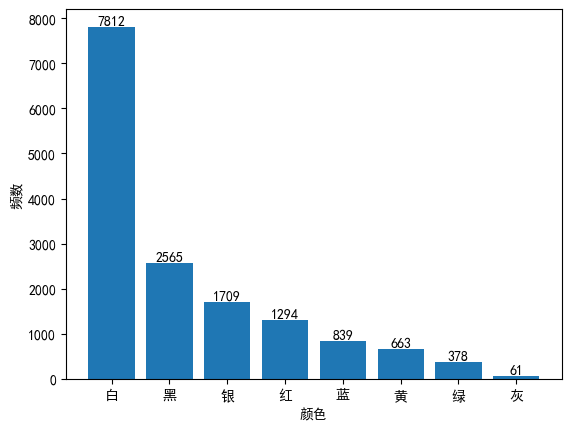

In [12]:
carcolor_frep=carcolor.value_counts()[:8]

plt.bar(carcolor_frep.index,carcolor_frep)
plt.xlabel('颜色')
plt.ylabel('频数')
for index, value in enumerate(carcolor_frep.values):  
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

##  汽车品牌分析

In [14]:
clpp=new_accid['clpp']
clpp.value_counts()[:50]

clpp
-1          1633
长安牌          831
五菱牌          546
大众汽车牌        443
丰田牌          397
雪佛兰牌         327
别克牌          323
福克斯牌         314
大众牌          292
北京现代牌        288
解放牌          287
东风标致牌        265
东风雪铁龙牌       239
奥迪牌          226
起亚牌          221
比亚迪牌         215
东风日产牌        209
吉利牌          207
长城牌          201
东风牌          195
捷达牌          195
马自达牌         172
江淮牌          168
瑞麒牌          141
吉利美日牌        140
夏利牌          135
奇瑞牌          135
豪爵牌          134
宝马牌          122
福田牌          117
宝来牌          103
宝马           102
北京牌          102
力帆牌           96
福特牌           95
江铃牌           91
嘉陵牌           87
钱江牌           87
海马牌           87
中华牌           86
万达牌           76
长安            74
思威牌           73
宗申牌           72
朗逸牌           72
荣威牌           70
金杯牌           69
梅赛德斯-奔驰牌      67
雅阁牌           63
英伦牌           63
Name: count, dtype: int64

In [15]:
clpp=clpp.str.replace('牌','')
clpp=clpp.replace('大众汽车','大众')
clpp=clpp.replace('北京','北京现代')
clpp.value_counts()[:50]

clpp
-1         1633
长安          905
大众          750
五菱          583
北京现代        411
丰田          408
别克          340
雪佛兰         339
福克斯         321
解放          302
东风标致        267
奥迪          266
东风雪铁龙       258
起亚          240
宝马          224
比亚迪         216
吉利          209
东风日产        209
长城          208
捷达          208
东风          207
马自达         176
江淮          171
夏利          157
奇瑞          149
瑞麒          141
吉利美日        141
豪爵          139
福田          120
宝来          106
梅赛德斯-奔驰     103
福特          100
力帆           98
嘉陵           97
海马           95
江铃           92
钱江           89
中华           87
宗申           80
万达           78
雅阁           77
金杯           75
思威           73
朗逸           72
荣威           70
一汽佳星         63
英伦           63
锋范           60
隆鑫           60
\N           59
Name: count, dtype: int64

In [17]:
clpp_freq=clpp.value_counts()[1:]
dic=dict(zip(clpp_freq.index,clpp_freq))
dic

{'长安': 905,
 '大众': 750,
 '五菱': 583,
 '北京现代': 411,
 '丰田': 408,
 '别克': 340,
 '雪佛兰': 339,
 '福克斯': 321,
 '解放': 302,
 '东风标致': 267,
 '奥迪': 266,
 '东风雪铁龙': 258,
 '起亚': 240,
 '宝马': 224,
 '比亚迪': 216,
 '吉利': 209,
 '东风日产': 209,
 '长城': 208,
 '捷达': 208,
 '东风': 207,
 '马自达': 176,
 '江淮': 171,
 '夏利': 157,
 '奇瑞': 149,
 '瑞麒': 141,
 '吉利美日': 141,
 '豪爵': 139,
 '福田': 120,
 '宝来': 106,
 '梅赛德斯-奔驰': 103,
 '福特': 100,
 '力帆': 98,
 '嘉陵': 97,
 '海马': 95,
 '江铃': 92,
 '钱江': 89,
 '中华': 87,
 '宗申': 80,
 '万达': 78,
 '雅阁': 77,
 '金杯': 75,
 '思威': 73,
 '朗逸': 72,
 '荣威': 70,
 '一汽佳星': 63,
 '英伦': 63,
 '锋范': 60,
 '隆鑫': 60,
 '\\N': 59,
 '斯柯达': 56,
 '翼虎': 55,
 '蒙迪欧': 55,
 '波罗': 52,
 '沃尔沃': 50,
 '金龙': 50,
 '金旅': 48,
 '雷克萨斯': 47,
 '昌河': 44,
 '飞度': 43,
 '思域': 43,
 '东南': 43,
 '豪泺': 42,
 '宝骏': 42,
 '三菱': 41,
 '红旗': 40,
 '哈飞': 39,
 '帕萨特': 39,
 '无': 38,
 '恒通客车': 38,
 '三铃': 36,
 '陕汽': 36,
 '大运': 34,
 '凯迪拉克': 34,
 '江铃全顺': 33,
 '桑塔纳': 33,
 '众泰': 32,
 '威志': 32,
 '南骏': 30,
 '明锐': 30,
 '传祺': 29,
 '翼搏': 29,
 '华泰圣达菲': 29,
 '轰轰烈': 27,
 '名爵': 26,
 '飞肯':

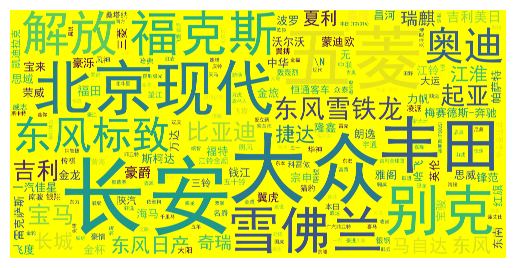

In [31]:
wc = WordCloud(font_path='simhei.ttf',background_color='yellow',scale=30)
wc.fit_words(dic)
plt.imshow(wc)
plt.axis('off')
plt.show()

##  肇事者分析

##  性别

In [32]:
sex=new_accid['sex']
sex_freq=sex.value_counts()
sex_freq

sex
1    14216
0     1118
Name: count, dtype: int64

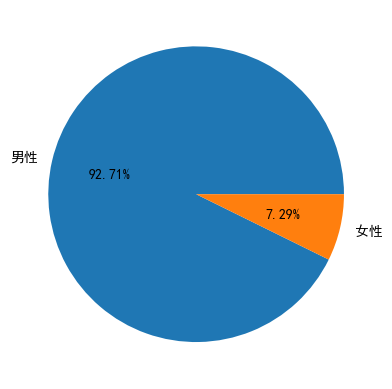

In [33]:
plt.pie(sex_freq,labels=['男性','女性'],autopct='%.2f%%')
plt.show()

##  驾龄

In [42]:
new_accid['accidenttime']=pd.to_datetime(new_accid['accidenttime'])
new_accid['cclzrq']=pd.to_datetime(new_accid['cclzrq'])

In [43]:
time_diff=new_accid['accidenttime']-new_accid['cclzrq']

In [44]:
type(_)

pandas.core.series.Series

In [45]:
time_diff

0       2988 days 07:20:00
1       3884 days 09:20:00
2       3299 days 09:00:00
3        891 days 08:00:00
4       3949 days 11:00:00
               ...        
15329   3495 days 18:50:00
15330   2433 days 18:00:00
15331   4778 days 11:10:00
15332   5012 days 07:37:00
15333    186 days 22:26:00
Length: 15334, dtype: timedelta64[ns]

In [46]:
year=(time_diff.dt.days)/365

In [47]:
new_accid['drive_year']=year.astype(int)

In [51]:
def cla(n,lim):
    return '[%.f,%.f)'%(lim*(n//lim),lim*(n//lim)+lim)

In [52]:
carage_group=pd.Series([cla(i,3) for i in new_accid['drive_year']])
carage_group_freq=carage_group.value_counts()
carage_group_freq

[0,3)      3948
[3,6)      2855
[6,9)      2545
[9,12)     2513
[12,15)    1321
[15,18)     736
[18,21)     666
[21,24)     393
[24,27)     151
[27,30)     115
[30,33)      34
[33,36)      29
[36,39)      17
[39,42)       7
[48,51)       2
[45,48)       1
[42,45)       1
Name: count, dtype: int64

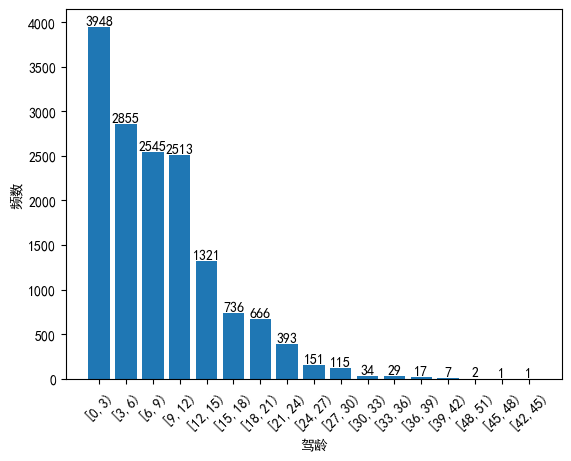

In [55]:
plt.bar(carage_group_freq.index,carage_group_freq)
plt.xticks(rotation=45)
plt.xlabel('驾龄')
plt.ylabel('频数')
for index, value in enumerate(carage_group_freq.values):  
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

##  年龄

In [57]:
new_accid['accidenttime_year']=new_accid['accidenttime'].dt.year
new_accid['brith_year']=new_accid['brith'].astype(str).str[:4].astype(int)
new_accid['age_year']=new_accid['accidenttime_year']-new_accid['brith_year']

In [58]:
age_group=pd.Series([cla(i,5) for i in new_accid['age_year']])
age_group_freq=age_group.value_counts().sort_index()
age_group_freq

[15,20)      34
[20,25)    1056
[25,30)    2737
[30,35)    2679
[35,40)    2434
[40,45)    2624
[45,50)    1737
[50,55)    1212
[55,60)     549
[60,65)     203
[65,70)      55
[70,75)      13
[75,80)       1
Name: count, dtype: int64

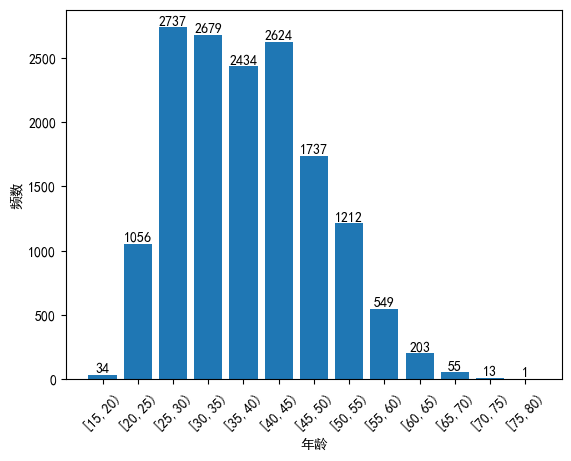

In [59]:
plt.bar(age_group_freq.index,age_group_freq)
plt.xticks(rotation=45)
plt.xlabel('年龄')
plt.ylabel('频数')
for index, value in enumerate(age_group_freq.values):  
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

##  事故类型分析